In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules

In [22]:
df = pd.read_csv("my_movies.csv")
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
V1               10 non-null object
V2               10 non-null object
V3               7 non-null object
V4               2 non-null object
V5               1 non-null object
Sixth Sense      10 non-null int64
Gladiator        10 non-null int64
LOTR1            10 non-null int64
Harry Potter1    10 non-null int64
Patriot          10 non-null int64
LOTR2            10 non-null int64
Harry Potter2    10 non-null int64
LOTR             10 non-null int64
Braveheart       10 non-null int64
Green Mile       10 non-null int64
dtypes: int64(10), object(5)
memory usage: 1.2+ KB


In [5]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')

In [24]:
dt = df.iloc[:,5:]
dt

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [25]:
frequent_itemsets = apriori(dt, min_support = 0.005, max_len = 3, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [26]:
frequent_itemsets = apriori(dt, min_support=0.03, max_len = 3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [27]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.1) ]

,support,itemsets,length
10,0.5,"(Gladiator, Sixth Sense)",2
11,0.1,"(LOTR1, Sixth Sense)",2
12,0.1,"(Harry Potter1, Sixth Sense)",2
13,0.4,"(Patriot, Sixth Sense)",2
14,0.1,"(LOTR2, Sixth Sense)",2
15,0.1,"(LOTR, Sixth Sense)",2
16,0.2,"(Green Mile, Sixth Sense)",2
17,0.6,"(Gladiator, Patriot)",2
18,0.1,"(Gladiator, LOTR)",2
19,0.1,"(Gladiator, Braveheart)",2


In [28]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'LOTR1', 'LOTR2'} ]

,support,itemsets,length
22,0.2,"(LOTR2, LOTR1)",2


C:\Users\karale_M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


Text(0, 0.5, 'support')

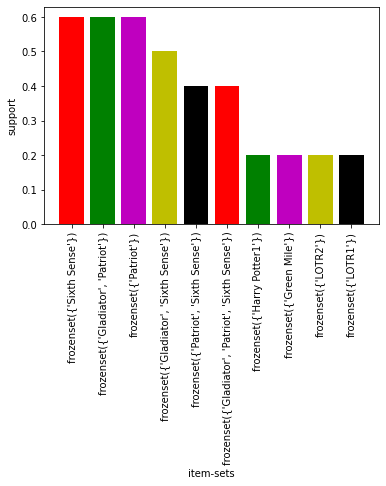

In [29]:
import matplotlib.pyplot as plt
# Most frequent itemsets based on support
frequent_itemsets.sort_values('support',ascending=False,inplace=True)
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11], rotation=90)
plt.xlabel("item-sets")
plt.ylabel('support')

In [30]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False, inplace=True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
85,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
80,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
123,(LOTR2),"(Green Mile, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
49,"(Green Mile, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
36,(LOTR1),"(Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
87,"(Green Mile, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
38,"(LOTR2, Sixth Sense)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
39,"(LOTR1, Sixth Sense)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
40,(LOTR2),"(LOTR1, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
41,(LOTR1),"(LOTR2, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
